# [Linear regrssion](https://medium.com/geekculture/linear-regression-from-scratch-in-python-without-scikit-learn-a06efe5dedb6)

 **Linear Regression is a type of predictive analysis algorithm that shows a linear relationship between the dependent variable(x) and independent variable(y).**

### The Equation of a Straight line Is : y = m*x+c

where,


x: input data points
    
    
y: predicted value, dependent variable (supervised learning)

The model gets the best-fit regression line by finding the best m, c values.


m: bias or slope of the regression line
    
    
c: intercept, shows the point where the estimated regression line crosses the 𝑦 axis

In [20]:
# Implimentation of linear regression without sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_excel("D:\Kartheek\Complete ML\Maths in ML\Matrices\s1.xlsx")

x=np.array(df[['Experience']])
y=np.array(df[['Salary']])
x,y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12]], dtype=int64),
 array([[100],
        [150],
        [200],
        [250],
        [300],
        [350],
        [400],
        [450],
        [500],
        [550],
        [600],
        [650]], dtype=int64))

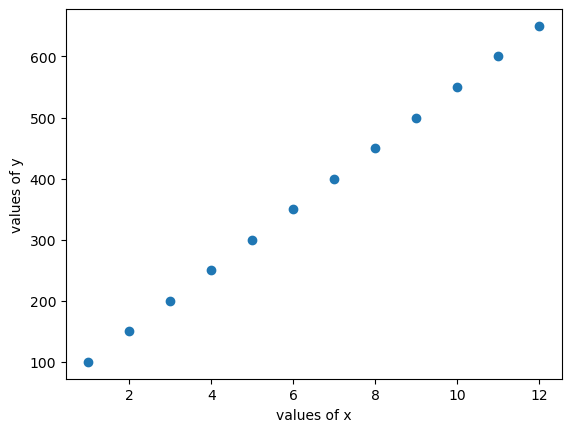

In [21]:
plt.scatter(x,y)
plt.xlabel("values of x")
plt.ylabel("values of y")
plt.show()

In [22]:
# Mean with a formula

# x_mean=sum(x)/len(x)
# y_mean=sum(y)/len(y)
# z=x_mean

# Mean without formula
x_mean=np.mean(x)
y_mean=np.mean(y)

x_mean,y_mean

(6.5, 375.0)

Caculate the cofficient and intercept

In [23]:
num=0
den=0
for i in range(len(x)):
    num+=(x[i]-x_mean)*(y[i]-y_mean)
    den+=(x[i]-x_mean)**2
    
m=num/den
c=y_mean-(m*x_mean)
print("Intercept is ",float(c),"Coffient is",float(m))

Intercept is  50.0 Coffient is 50.0


In [24]:
y_pread=c+m*x
print(y_pread)

[[100.]
 [150.]
 [200.]
 [250.]
 [300.]
 [350.]
 [400.]
 [450.]
 [500.]
 [550.]
 [600.]
 [650.]]


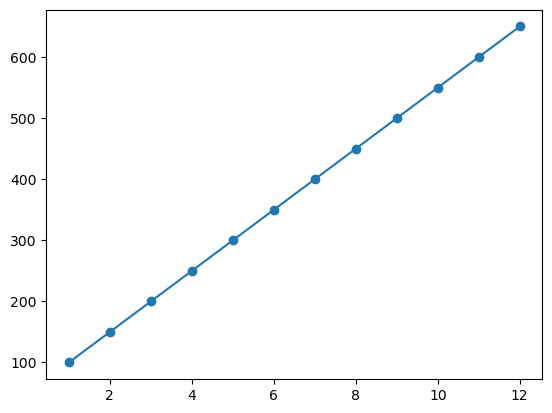

In [25]:
plt.scatter(x,y)
plt.plot(x,y_pread)
plt.show()

Finding the difference between the predicte value and the actual value

In [26]:
num_r=0
den_r=0
for i in range(len(x)):
    num_r+=(y[i]-y_pread[i])**2
    den_r+=(y[i]-y_mean)**2
    
r_square=1-(num_r/den_r)

print("the difference between the predicted value and Expected values" ,float(r_square))

the difference between the predicted value and Expected values 1.0


# Build the Linear Regression model from Scratch with greeksforgreek.org


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

data=pd.read_csv('D:\Kartheek\Jupitor\From greek\data_for_lr.csv')

data = data.dropna()

train_input = np.array(data.x[0:500]).reshape(500,1)
train_output  = np.array(data.y[0:500]).reshape(500,1)

test_input = np.array(data.x[500:700]).reshape(199,1)
test_output  = np.array(data.y[500:700]).reshape(199,1)


In [28]:
class LinearRegression:
	def __init__(self):
		self.parameters = {}
	
	def forward_propagation(self, train_input):
		m = self.parameters['m']
		c = self.parameters['c']
		predictions = np.multiply(m, train_input) + c
		return predictions

	def cost_function(self, predictions, train_output):
		cost = np.mean((train_output - predictions) ** 2)
		return cost

	def backward_propagation(self, train_input, train_output, predictions):
		derivatives = {}
		df = (train_output - predictions) * -1
		dm = np.mean(np.multiply(train_input, df))
		dc = np.mean(df)
		derivatives['dm'] = dm
		derivatives['dc'] = dc
		return derivatives

	def update_parameters(self, derivatives, learning_rate):
		self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
		self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

	def train(self, train_input, train_output, learning_rate, iters):
		#initialize random parameters
		self.parameters['m'] = np.random.uniform(0,1) * -1
		self.parameters['c'] = np.random.uniform(0,1) * -1
		
		#initialize loss
		self.loss = []
		
		#iterate
		for i in range(iters):
			#forward propagation
			predictions = self.forward_propagation(train_input)

			#cost function
			cost = self.cost_function(predictions, train_output)

			#append loss and print
			self.loss.append(cost)
			print("Iteration = {}, Loss = {}".format(i+1, cost))

			#back propagation
			derivatives = self.backward_propagation(train_input, train_output, predictions)

			#update parameters
			self.update_parameters(derivatives, learning_rate)

		return self.parameters, self.loss


In [29]:
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)

Iteration = 1, Loss = 3525.1703738472925
Iteration = 2, Loss = 1603.718436822751
Iteration = 3, Loss = 731.9535610742474
Iteration = 4, Loss = 336.4328677035161
Iteration = 5, Loss = 156.984687385448
Iteration = 6, Loss = 75.56884557037733
Iteration = 7, Loss = 38.630384318958505
Iteration = 8, Loss = 21.87135989443156
Iteration = 9, Loss = 14.267768310024858
Iteration = 10, Loss = 10.818006746298767
Iteration = 11, Loss = 9.252842464092119
Iteration = 12, Loss = 8.542722056151854
Iteration = 13, Loss = 8.220536001231379
Iteration = 14, Loss = 8.074356192151395
Iteration = 15, Loss = 8.008030611944335
Iteration = 16, Loss = 7.97793498401005
Iteration = 17, Loss = 7.96427692573501
Iteration = 18, Loss = 7.958076611204586
Iteration = 19, Loss = 7.955259883454873
Iteration = 20, Loss = 7.953978292958636


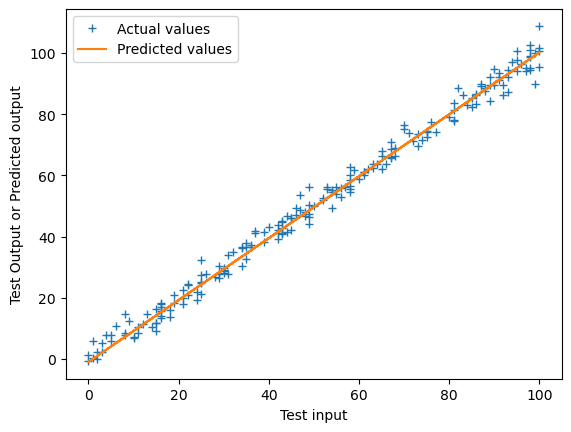

In [30]:
#Prediction on test data
y_pred = test_input*parameters['m'] + parameters['c']

# Plot the regression line with actual data pointa
plt.plot(test_input, test_output, '+', label='Actual values')
plt.plot(test_input, y_pred, label='Predicted values')
plt.xlabel('Test input')
plt.ylabel('Test Output or Predicted output')
plt.legend()
plt.show()


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt

df=pd.read_excel("D:\Kartheek\Complete ML\Maths in ML\Simple Linear Regression\S1.xlsx")
df.head()

x=np.array(df[['Experience']])
y=np.array(df[['Salary']])

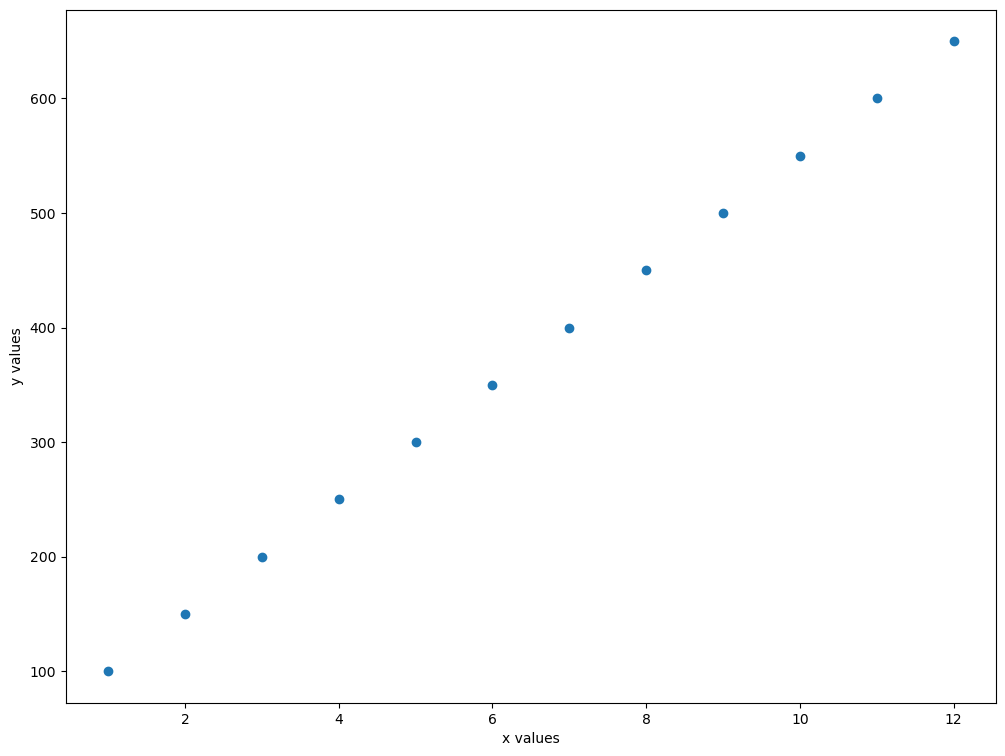

In [17]:
plt.scatter(x,y)
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()

In [18]:
x_mean=np.mean(x)
y_mean=np.mean(y)
x_mean,y_mean

(6.5, 375.0)

In [19]:
num=0
den=0
for i in range(len(x)):
    num+=(x[i]-x_mean)*(y[i]-y_mean)
    den+=(x[i]-x_mean)**2
    
m=num/den
c=y_mean-(m*x_mean)
m,c

(array([50.]), array([50.]))

In [20]:
y_pread=m*x+c
y_pread

array([[100.],
       [150.],
       [200.],
       [250.],
       [300.],
       [350.],
       [400.],
       [450.],
       [500.],
       [550.],
       [600.],
       [650.]])

<function matplotlib.pyplot.show(close=None, block=None)>

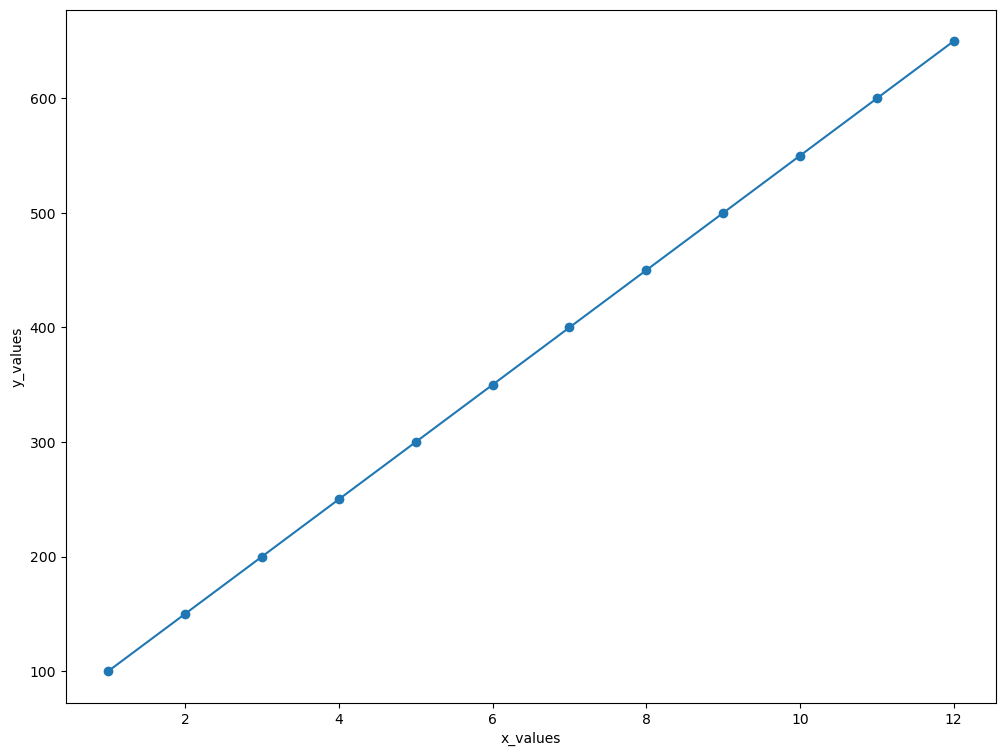

In [21]:
plt.scatter(x,y)
plt.plot(x,y_pread)
plt.xlabel("x_values")
plt.ylabel("y_values")

plt.show

In [3]:
rnum=0
rden=0

#for i in range(len(x)):
 #   rnum+=(y[i]-y_pread[i])**2
  #  rden+=(y[i]-y_mean)**2
    
#rsq= 1 - (rnum / rden)
#rsq

for i in range(len(X)):
    
    rnum+=(y_pread[i]-y_mean)**2
    rden+=(y[i]-y_mean)**2
    
rsq=1-(rnum/rden)
print(rsq)


NameError: name 'X' is not defined

# Gradient Descent

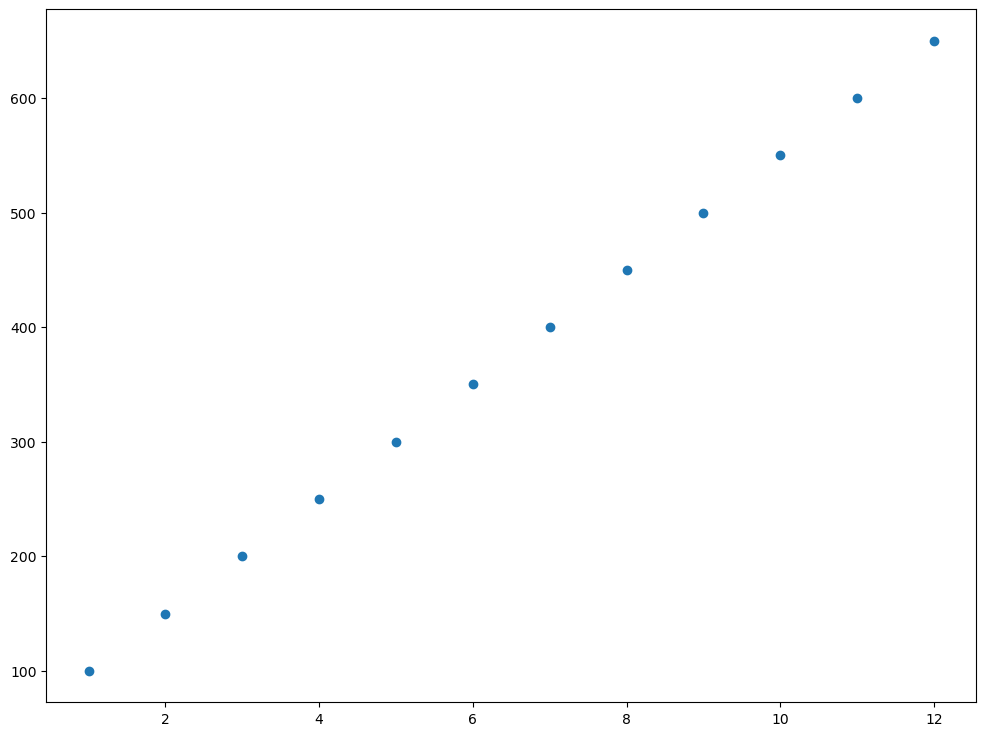

In [24]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
data = pd.read_excel('D:\Kartheek\Complete ML\Maths in ML\Simple Linear Regression\s1.xlsx')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

In [25]:

# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

54.999953763404264 8.493154395333429


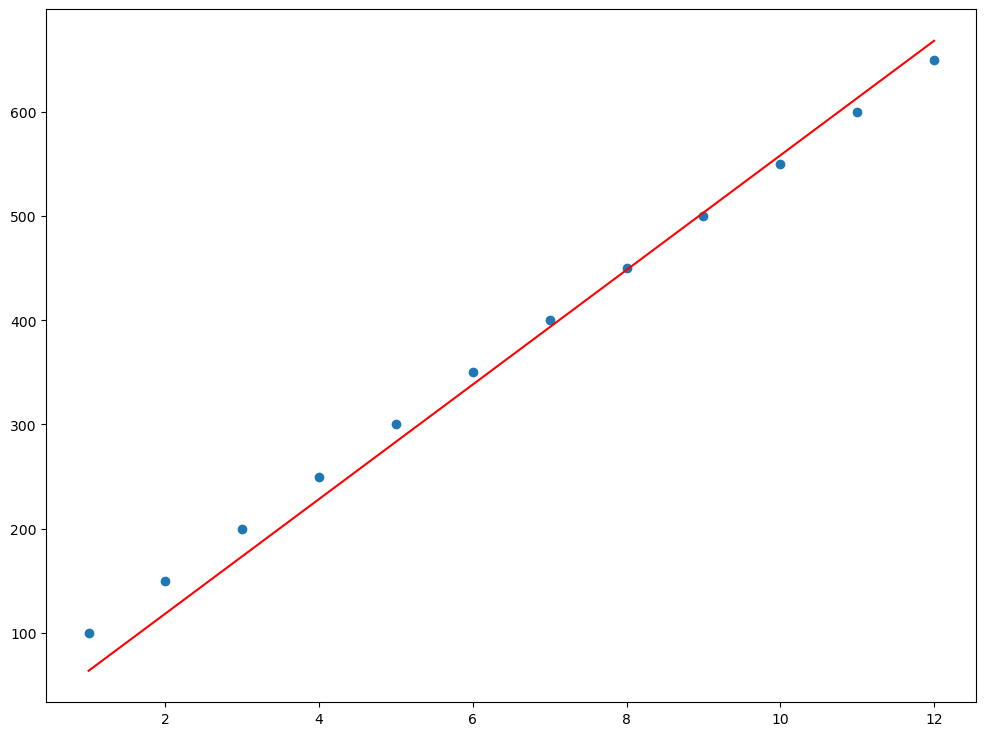

In [26]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot(X,Y_pred,color="red")
#plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()


In [27]:
nm=0
Y_mean=Y.mean()
dn=0
for i in range(len(x)):
    nm+=(Y_pred[i]-y[i])**2
    dn+=(Y[i]-Y_mean)**2
    
rs=1-(nm/dn)

print(rs)

[0.98727698]
